# Détection des bouteilles

## Extraction des images depuis la vidéo

In [1]:
import cv2
import os

def extract_frames(video_path, output_folder, frame_rate=10):
    cap = cv2.VideoCapture(video_path)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    frame_count = 0
    img_index = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_count += 1
        
        if frame_count % int(cap.get(5) / frame_rate) == 0:
            output_file = os.path.join(output_folder, f'img{img_index}.jpg')
            img_index += 1
            cv2.imwrite(output_file, frame)

    cap.release()
    cv2.destroyAllWindows()

In [2]:
video_path = 'video/output.mp4'
output_folder = 'frames'

In [3]:
# Retirer le commentaire pour extraire les images du fichier vidéo
#extract_frames(video_path, output_folder)

In [4]:
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

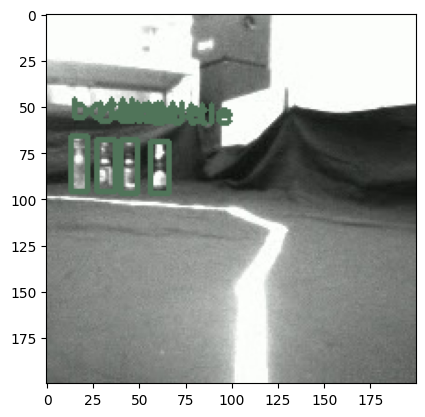

In [5]:
img = cv2.imread('frames/img35.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

bbox, label, conf = cv.detect_common_objects(img, confidence=0.6, model='yolov4')
output_image = draw_bbox(img, bbox, label, conf)

plt.imshow(output_image)

In [6]:
def image_line(imgs, col):
    _, axs = plt.subplots(1, col, figsize=(20, 20))
    for i, img in enumerate(imgs):
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

In [7]:
def get_images(path, indexes):
    imgs = []
    for i in indexes:
        img = cv2.imread(os.path.join(path, f'img{i}.jpg'))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
    return imgs

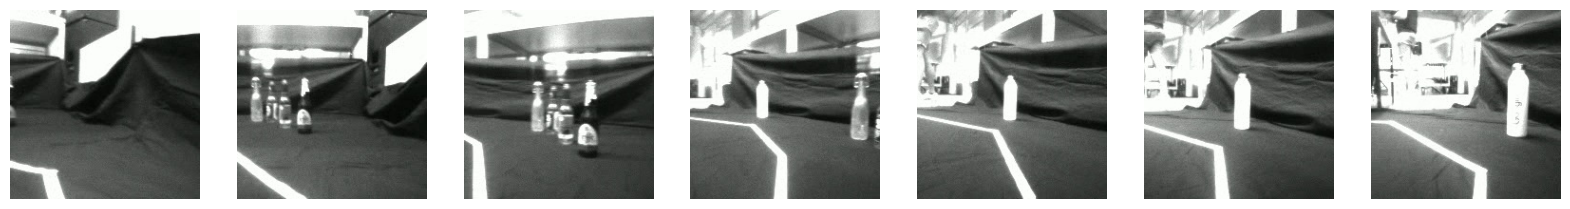

In [8]:
import numpy as np

test_images = get_images('frames', np.arange(39, 46, 1))
image_line(test_images, 7)